## Installing Plotly/squarify/vaderSentimnet/Chart_Studio and Spacy library

In [2]:
!pip install plotly==4.5.2                      # Install plotly 4.5.2 version
! pip install squarify                          # Install squarify for treemap plot
! pip install vaderSentiment                    # Install vaderSentiment for populate polarity for text
!pip install chart_studio                       # Install chart_studio for plotly plot
!python -m spacy download en_core_web_md        # Install spacy library
! pip install ggplot                            # Install ggplot library

     |████████████████████████████████| 7.1MB 2.6MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 133kB 2.7MB/s 
     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 96.4MB 881kB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=fca0bddc1e6d572481bdb735c4c288eb0a7466c54a17bfaee9c8845105e5a331
  Stored in directory: /tmp/pip-ephem-wheel-cache-5fqjd6q3/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
     |████████████████████████████████| 2.2MB 2.7MB/s 


# Importing libaries

In [78]:
import os
import pandas as pd                                             # Import pandas library for dataframe operation
import numpy as np                                              # Import numpy library for array opertaion
from sklearn.feature_extraction import text                     # Import text library from sklearn 
from sklearn.feature_extraction.text import CountVectorizer     # Import CountVectorizer library for text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer     # Import TfidfVectorizer library for text vectorization
import warnings                                                 # Import warnings
warnings.filterwarnings('ignore')                
import matplotlib                                               # Import matplotlib for various plot 
import matplotlib.dates as mdates                               # Import mdates from matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns                                           # Import seaborn for various plot
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import chart_studio.plotly as py                                # Import chart_studio for various plotly plot
import plotly.graph_objs as go
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#from sklearn.decomposition import TruncatedSVD                 
#from sklearn.decomposition import LatentDirichletAllocation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # Import SentimentInensityAnalyzer for assign polarity score for text
from sklearn.manifold import TSNE                                     # Import TNSE library
from sklearn.preprocessing import StandardScaler                      # Import StandardScaler library
from sklearn.compose import ColumnTransformer                         # Import ColumnTransformer library for column transformation 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder         # Import LabelEncoder and OneHotEncoder library from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
                                                                      # Import LDA model
from sklearn.decomposition import PCA                                 # Import PCA model
from mpl_toolkits.mplot3d import Axes3D                               # Import Axes3D
#from bokeh.plotting import figure, output_file, show                  
#from bokeh.models import Label
#from bokeh.io import output_notebook
#output_notebook()
from collections import Counter                                       # Import Counter library
import spacy                                                          # Import spacy libary for nlp text analysis
import re                                                             # Import regular expression library
from pprint import pprint
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
import plotly.io as pio
pio.renderers.default = 'colab'
import textblob                                                       # Import textblob for assign polarity score for text
from textblob import TextBlob
from wordcloud import WordCloud                                       # Import wordcloud for text visualization
import squarify
import nltk                                                           # Import nltk library for nlp activities on text
nltk.download('stopwords')
from nltk.corpus import stopwords                                     # Import stopwords from nltk library
stop = stopwords.words('english')
import plotly.express as px

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Mount google drive at mydrive\data folder path

In [1]:
#from google.colab import drive     # Import drive for set input file for loading to colab
#drive.mount('/content/gdrive')

## Loading COVID-19 Clean text dataset

In [0]:
tweet_df = pd.read_csv("../data/cleaned_dataset_v5.csv")      # read input dataset 

## Display top 5 rows of COVID-19 Dataset

In [6]:
tweet_df.head()                 # Display top 5 rows of input dataset

,Tweet_date,Tweet_time,Tweet_City,Tweet_Country,Tweet_account,Retweet_count,Tweet_Text
0,4/1/2020,0:08:00,NaN,Australia,GSK_AU,0,ask award research excellence open nomination ...
1,4/1/2020,0:35:00,NaN,Australia,GSK_AU,3,award research excellence open nomination awar...
2,4/1/2020,0:45:00,Basel,Switzerland,Novartis News,31,face global crisis novartis mobilized ramp cap...
3,4/1/2020,0:46:00,Basel,Switzerland,Novartis News,2,information response visit
4,4/1/2020,0:59:00,Basel,Switzerland,Novartis News,4,clinical investigation assessing portfolio exi...


In [7]:
tweet_df.tail()                # Display bottom 5 rows of input dataset

,Tweet_date,Tweet_time,Tweet_City,Tweet_Country,Tweet_account,Retweet_count,Tweet_Text
14230,4/16/2020,9:16,NaN,NaN,DmitryLysenko3,44,footage coming chinese wet market dog slaughte...
14231,4/16/2020,9:23,NaN,NaN,FuturEnviro,515,eu add billion tackle pandemic money medical
14232,4/16/2020,9:45,NaN,NaN,Dr_Khan,4,matter crunch number pandemic started william ...
14233,4/16/2020,9:50,York,UK,networkyork2006,0,excellent virtual meeting morning
14234,4/16/2020,9:52,Yuma,USA,Kozmocostello,0,economy function plague economy dying employee...


In [8]:
tweet_df.shape   # Display the shape of the dataset

(14235, 7)

__Conclusion__ : Input Dataset contains 14235 rows and 5 columns.

In [9]:
tweet_df.info()                # get details about the input dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14235 entries, 0 to 14234
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_date     14235 non-null  object
 1   Tweet_time     14235 non-null  object
 2   Tweet_City     9483 non-null   object
 3   Tweet_Country  10306 non-null  object
 4   Tweet_account  14235 non-null  object
 5   Retweet_count  14235 non-null  int64 
 6   Tweet_Text     14017 non-null  object
dtypes: int64(1), object(6)
memory usage: 778.6+ KB


__Conclusion__ : Input Dataset have __218__ Null values for __Tweet_Text__ column , __3929__ Null values for __Tweet_Country__ & __4752__ Null values for __Tweet_City__ column.

In [10]:
tweet_df['Tweet_Text'].isnull().sum() # Display Null Tweet_text values count

218

In [11]:
tweet_df.dropna(subset=['Tweet_Text'],inplace=True)  # Removed the Null values from Tweet_text column
tweet_df.reset_index(drop=True,inplace=True)
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14017 entries, 0 to 14016
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_date     14017 non-null  object
 1   Tweet_time     14017 non-null  object
 2   Tweet_City     9323 non-null   object
 3   Tweet_Country  10123 non-null  object
 4   Tweet_account  14017 non-null  object
 5   Retweet_count  14017 non-null  int64 
 6   Tweet_Text     14017 non-null  object
dtypes: int64(1), object(6)
memory usage: 766.7+ KB


## Finding Duplicate Tweet Based on Account,Date,Time,City,Country and Tweet text 

In [0]:
duplicate_tweet = tweet_df[tweet_df.duplicated(['Tweet_Text','Tweet_date','Tweet_time','Tweet_City','Tweet_Country','Tweet_account'])]

In [13]:
duplicate_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 2055 to 13681
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_date     293 non-null    object
 1   Tweet_time     293 non-null    object
 2   Tweet_City     145 non-null    object
 3   Tweet_Country  167 non-null    object
 4   Tweet_account  293 non-null    object
 5   Retweet_count  293 non-null    int64 
 6   Tweet_Text     293 non-null    object
dtypes: int64(1), object(6)
memory usage: 18.3+ KB


__Conclusion__ : There are __293__ Duplicate Tweets are present in input dataset.

## Finding Duplicate Tweet on Account ,City ,Country and Tweet Text

In [0]:
duplicate_tweet1 = tweet_df[tweet_df.duplicated(['Tweet_Text','Tweet_City','Tweet_Country','Tweet_account'])]

In [15]:
duplicate_tweet1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 44 to 14008
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_date     906 non-null    object
 1   Tweet_time     906 non-null    object
 2   Tweet_City     642 non-null    object
 3   Tweet_Country  679 non-null    object
 4   Tweet_account  906 non-null    object
 5   Retweet_count  906 non-null    int64 
 6   Tweet_Text     906 non-null    object
dtypes: int64(1), object(6)
memory usage: 56.6+ KB


__Conclusion__ : There are __906__ Duplicate Tweets present in input dataset on the basis of __Account__ , __City__, __Country__.

## Dropping Duplicate Tweets Based on Date ,time ,City ,Country and Account and Tweet Text

In [0]:
tweet_df.drop_duplicates(subset=['Tweet_Text','Tweet_date','Tweet_time','Tweet_City','Tweet_Country','Tweet_account'],
                                       keep='first',inplace = True)

In [17]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13724 entries, 0 to 14016
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_date     13724 non-null  object
 1   Tweet_time     13724 non-null  object
 2   Tweet_City     9178 non-null   object
 3   Tweet_Country  9956 non-null   object
 4   Tweet_account  13724 non-null  object
 5   Retweet_count  13724 non-null  int64 
 6   Tweet_Text     13724 non-null  object
dtypes: int64(1), object(6)
memory usage: 857.8+ KB


__Conclusion__ : There are total __13724__ Valid Tweets present in input dataset after Dropping duplicates considering all the columns.

In [0]:
tweet_df['Created Date'] = pd.to_datetime(tweet_df['Tweet_date'] + ' ' + tweet_df['Tweet_time'])  # Added new column 'Created Date' from 'Tweet_date' & 'Tweet_time' column for further analysis

# Number of Tweets per Date Bar Plot

<Figure size 1008x432 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Number of tweets')

Text(0.5, 1.0, 'Number of tweets according to dates')

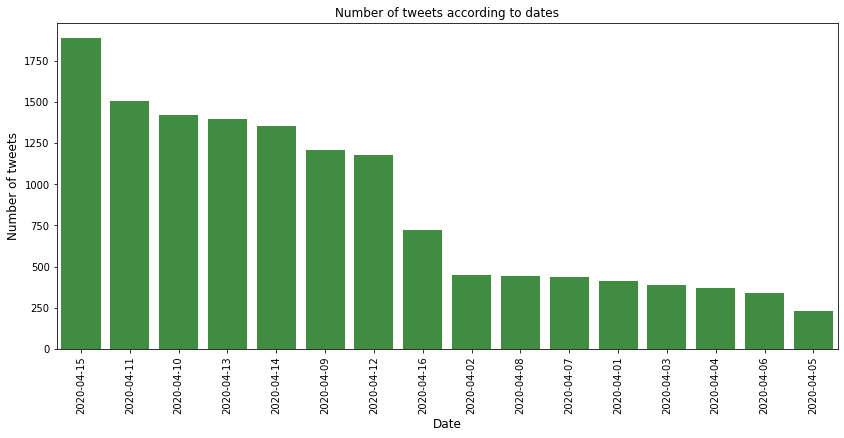

In [19]:
date_cnt = tweet_df['Created Date'].dt.date.value_counts()         # get count values as per Created Date column values 
#date_cnt = date_cnt.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(date_cnt.index, date_cnt.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets according to dates")
plt.show()

## Donut Chart for Weekwise Distribution of Tweets 

In [0]:
tweet_df['tweeted_day_of_week'] = tweet_df['Created Date'].dt.day_name()      # Get Day of week from Created Date column

In [0]:
cnt_ = tweet_df['tweeted_day_of_week'].value_counts()                         # Get week day value count to plot Donut-Chart for tweets
cnt_ = cnt_.sort_index() 
fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Number of tweets per day",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of tweets per days of the week",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Percentage of Tweets according to days of the week",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)


__Conclusion__ : Most Tweets Percentage on __Wedensday(19.9% )__ & __Thursday (17.3%)__ and __Sunday (10.2%)__ leads to least tweet

# TreeMap Chart shows Distribution of Tweets Weekdays

In [21]:
# This plot shows distribution of Tweets per weekday and plot through TreeMap Plot
x = 0.
y = 0.
width = 50.
height = 50.
type_list = list(tweet_df['tweeted_day_of_week'].unique())
values = [len(tweet_df[tweet_df['tweeted_day_of_week'] == i]) for i in type_list]

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

__Conclusion__ : Most of the tweets are on __Wednesday (2736)__ & __Thursday(2375)__ and __Sunday(1875)__ has least tweets.

## Plotting number of tweets per hour

In [22]:
tweet_df['created_at_hour'] = tweet_df['Created Date'].dt.hour   # extract the hours from the Created Date column 
cnt_ = tweet_df['created_at_hour'].value_counts()                # Get the count of hour count to plot line graph 
cnt_ = cnt_.sort_index() 
trace1 = go.Scatter(
                    x = cnt_.index,
                    y = cnt_.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Number of tweets per hour',
              xaxis= dict(title= 'Tweets per hour',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

__Conclusion__ : Most of the Tweets are tweeted around __Evening__ timeperiod and least during __mid-night__ duration.

## Tweets from USA per Hours

In [0]:
usa_df = tweet_df[tweet_df['Tweet_Country']=='USA']      # Extract tweets for USA Country only 

In [24]:
usa_cnt = usa_df['created_at_hour'].value_counts()       # get the counts of hours for USA country
usa_cnt = usa_cnt.sort_index() 
trace1 = go.Scatter(
                    x = usa_cnt.index,
                    y = usa_cnt.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'USA Members Number of tweets per hour',
              xaxis= dict(title= 'Tweets per hour',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

__Conclusion__ : In __USA__ Countries , Most of the tweets are tweeted during __evening__ as compared to __mid-night__ timeperiod.

## Tweets from UAE per Hour Analysis

In [0]:
uae_df = tweet_df[tweet_df['Tweet_Country']=='UAE']   # Extract UAE countries tweet from tweet_df dataframe object

In [26]:
uae_cnt = uae_df['created_at_hour'].value_counts()    # Get the count of hours for UAE countries
uae_cnt = uae_cnt.sort_index() 
trace1 = go.Scatter(
                    x = uae_cnt.index,
                    y = uae_cnt.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Number of tweets per hour',
              xaxis= dict(title= 'Tweets per hour',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

__Conclusion__ : In __UAE__ Countries , Most of the tweets are tweeted __morning timeperiod__ from __8 AM to 11 AM__ and __7 PM to 8 PM__ in the __evening__ as compared to __evening timeperiod__ from __9 PM to 11 PM__ .

In [0]:
tweet_df.loc[tweet_df['Tweet_Country']==' USA',['Tweet_Country']]='USA'  #Replacing ' USA' to 'USA' as both are same.

In [28]:
top10_country_tweet = tweet_df['Tweet_Country'].value_counts()[:10]    # get Top 10 Country from tweet_df dataframe object.
print(top10_country_tweet)

USA            3597
UAE            2006
Switzerland     859
UK              707
India           622
Canada          373
Global          169
Australia       127
Nigeria         109
Singapore       108
Name: Tweet_Country, dtype: int64


## Top 10 Countries Tweets Bar Plot



<Figure size 1008x432 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Number of tweets')

Text(0.5, 1.0, 'Number of tweets according to Country')

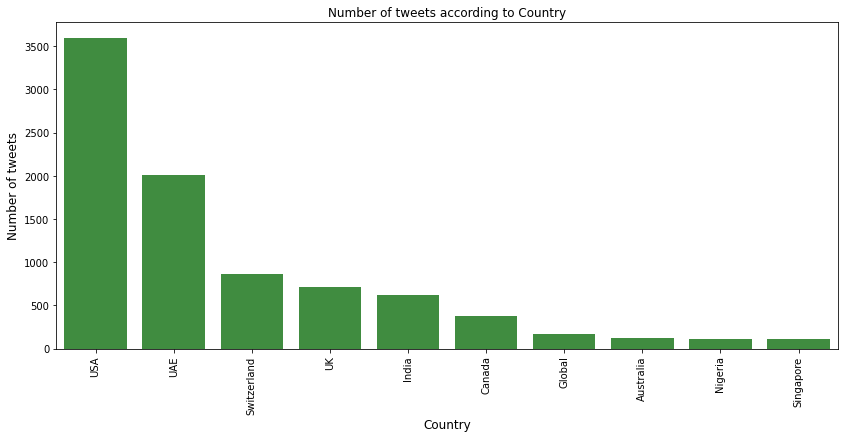

In [29]:
top10_country_tweet = tweet_df['Tweet_Country'].value_counts()[:10]      # Get the top 10 countries tweets count
#top10_country_tweet = top10_country_tweet.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(top10_country_tweet.index, top10_country_tweet.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets according to Country")
plt.show()

In [30]:
cnt_ = tweet_df['Tweet_Country'].value_counts()[:10]
cnt_.reset_index()

,index,Tweet_Country
0,USA,3597
1,UAE,2006
2,Switzerland,859
3,UK,707
4,India,622
5,Canada,373
6,Global,169
7,Australia,127
8,Nigeria,109
9,Singapore,108


In [31]:
# Plotly Bar plot showing distribution of tweets across top 10 countries
trace1 = go.Bar(
                x = cnt_.index,
                y = cnt_.values,
                name = "Number of tweets on COVID-19 by Countries.",
                marker = dict(color = 'rgba(200, 74, 55, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                )

data = [trace1]
layout = go.Layout(barmode = "group",title = 'Number of tweets on COVID-19 by Counties.')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

__Conclusion__ : Most of Tweets are tweeted from __USA__, __UAE__, __Switzerland__, __UK__ and __India__ Countries with respect to other countries.

In [0]:
top10_tweet_account = tweet_df['Tweet_account'].value_counts()[:10]     # get the count of tweets for top 10 tweet account

In [33]:
print(top10_tweet_account)

EmiratesSupport    1971
WHO                 701
skift               300
NYSE                202
WorldBank           159
UberUK              137
Nasdaq              132
Uber                128
cisco_in            126
amazon              122
Name: Tweet_account, dtype: int64


In [34]:
account_cnt = tweet_df['Tweet_account'].value_counts()[:10]
account_cnt.reset_index()

,index,Tweet_account
0,EmiratesSupport,1971
1,WHO,701
2,skift,300
3,NYSE,202
4,WorldBank,159
5,UberUK,137
6,Nasdaq,132
7,Uber,128
8,cisco_in,126
9,amazon,122


In [35]:
# Plotly Bar plot showing distribution of Tweet per Tweet Account
trace1 = go.Bar(
                x = account_cnt.index,
                y = account_cnt.values,
                name = "Number of tweets on COVID-19 by Top 10 Accounts.",
                marker = dict(color = 'rgba(128,0,128, 0.5)',
                             line=dict(color='rgb(128,0,128)',width=1.5)),
                )

data = [trace1]
layout = go.Layout(barmode = "group",title = 'Number of tweets on COVID-19 by Top 10 Accounts.')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Getting Sentiment Polarity using VaderSentimentAnalyzer library for Tweet_Text

In [0]:
analyzer = SentimentIntensityAnalyzer()                           # getting sentiment polarity using Vader library from Tweet_Text on compound 
sentiment = tweet_df['Tweet_Text'].apply(lambda x: analyzer.polarity_scores(x))
tweet_df = pd.concat([tweet_df,sentiment.apply(pd.Series)],1)
tweet_df = tweet_df.rename(columns={'compound':'vader_polarity'})

## Distribution Plot for Sentiment Polarity 

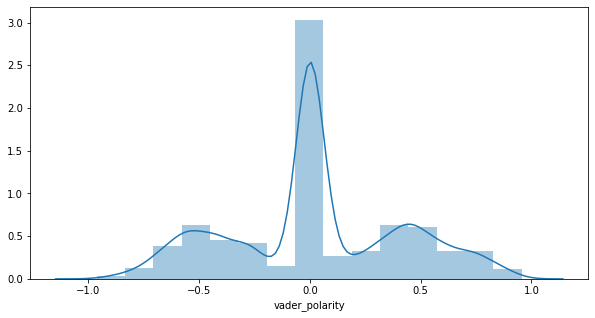

In [37]:
fig = plt.figure(figsize=(10,5))    
ax = fig.add_subplot(111)
sns.distplot(tweet_df['vader_polarity'], bins=15, ax=ax)     # Plot histogram plot to know distribution of sentiment 
plt.show()

## Getting Sentiment Polarity using TextBlob library for Tweet_Text

In [0]:
#Add Polarity based on TextBlob 
tweet_df['Textblob_Polarity'] = tweet_df['Tweet_Text'].map(lambda text: TextBlob(text).sentiment.polarity)
#tweet_df.head()

## Histogram Plot for TextBlob Polarity 

In [43]:
# Histogram plot for TextBlob Ploarity score 
tweet_df['Textblob_Polarity'].iplot(               
    kind='hist',
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

## Comparison Between Vader Polarity Vs TextBlob Polarity Score

Text(0.5, 0, 'Sentiments')

Text(0, 0.5, 'Probability Density')

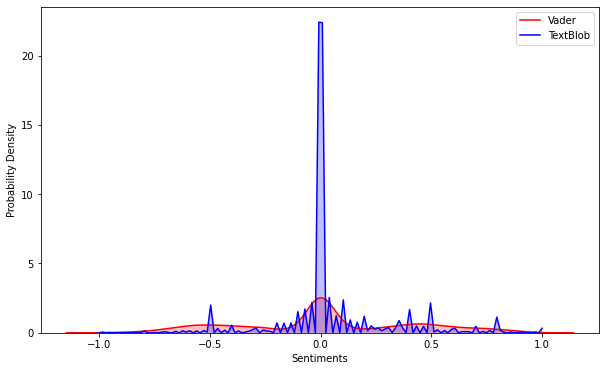

In [46]:
sns.kdeplot(tweet_df['vader_polarity'], 
            color='r', shade=True, Label='Vader') 

sns.kdeplot(tweet_df['Textblob_Polarity'], 
            color='b', shade=True, Label='TextBlob')
  
plt.xlabel('Sentiments') 
plt.ylabel('Probability Density') 

## Datewise sentiment Distribution Plot

<Figure size 2160x432 with 0 Axes>

Text(0.5, 1.0, 'Average Tweet Sentiment by Dates')

Text(0.5, 0, 'Dates')

Text(0, 0.5, 'Sentiment')

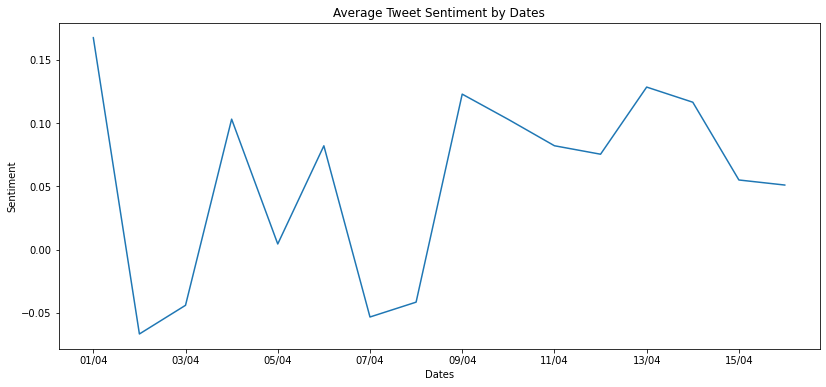

In [51]:
#Sentiment by Dates

date = tweet_df['Tweet_date'].map(lambda date: mdates.datestr2num(date)).unique()
avg_polarity = tweet_df[['vader_polarity']].groupby(by=tweet_df['Tweet_date']).mean()

plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
plt.title('Average Tweet Sentiment by Dates')
plt.xlabel('Dates')
plt.ylabel('Sentiment')
sns.set(palette='Set1',color_codes=True)
plt.plot(date,avg_polarity)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

__Conclusion__: For __2nd ,3rd ,7th__ and __8th__ April most of the tweets have polarity score less than 0 and follows negative sentiment .


## Countries Distribution of Sentiment (Violinplot)

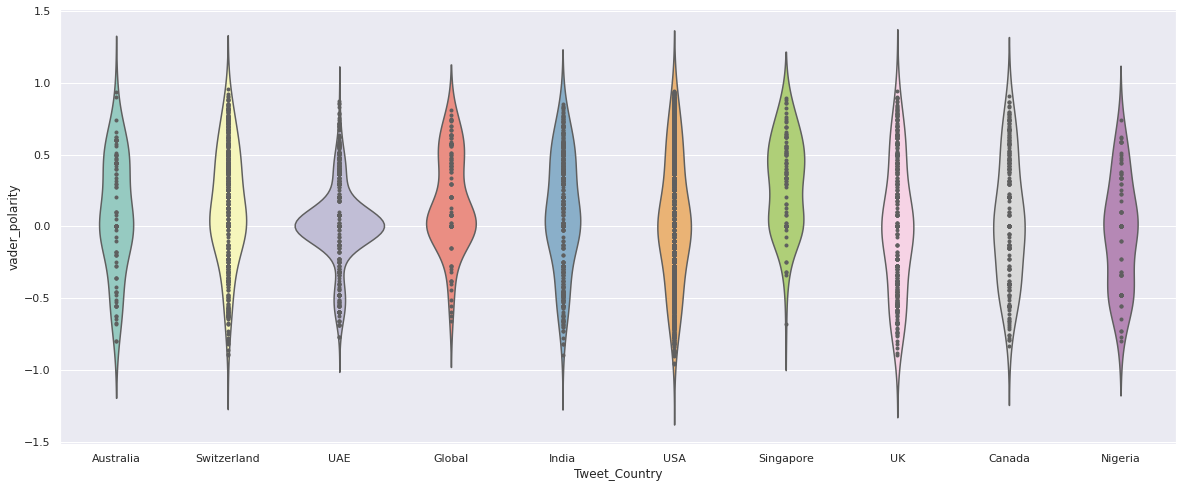

In [52]:
#Top ten countries
countries = ['USA', 'UAE', 'Switzerland', 'UK', 'India', 'Canada', 'Global', 'Australia', 'Nigeria', 'Singapore']
#Country-wise Sentiments - Violinplot
fig, ax = plt.subplots(figsize =(20, 8))
sns.violinplot(ax = ax, x=tweet_df.loc[tweet_df['Tweet_Country'].isin(countries)]['Tweet_Country'] , 
               y=tweet_df['vader_polarity'], palette='Set3', bw=0.5, inner='points')

## Countries Distribution of Sentiment (BoxPlot)

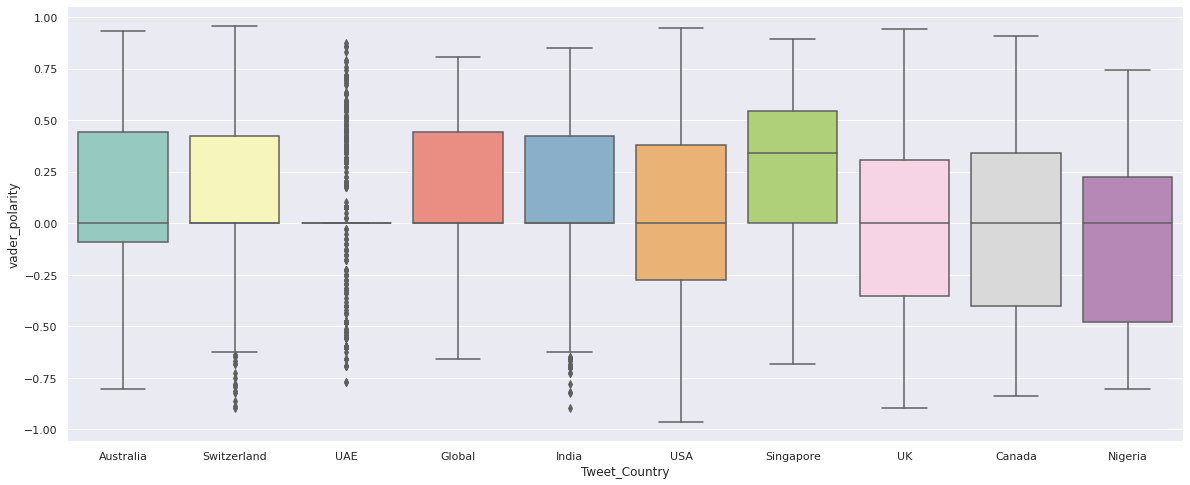

In [54]:
#Country-wise Sentiments - Boxplot
fig, ax = plt.subplots(figsize =(20, 8))
sns.boxplot(ax = ax, x=tweet_df.loc[tweet_df['Tweet_Country'].isin(countries)]['Tweet_Country'] , 
               y=tweet_df['vader_polarity'], palette='Set3')

## Feature Scale Retweet_Count column values 

In [0]:
# Feature Scaling retweet count 
retweets_df = tweet_df.loc[tweet_df['Retweet_count'] < 2000 ]                  # get only Retweet_count < 2000 values from tweet_df Dataframe object
retweets_df.reset_index(drop=True, inplace=True)

ct = ColumnTransformer([                                                        # standardize the Retweet_Count column values
        ('scale', StandardScaler(), ['Retweet_count'])
    ], remainder='passthrough')

retweets_df['Scaled_Retweets'] = ct.fit_transform(retweets_df[['Retweet_count']])


## Countrywise Retweet_count Vs Sentiment Comparison

Text(0.5, 1.0, 'Retweets Vs Polarity (USA)')

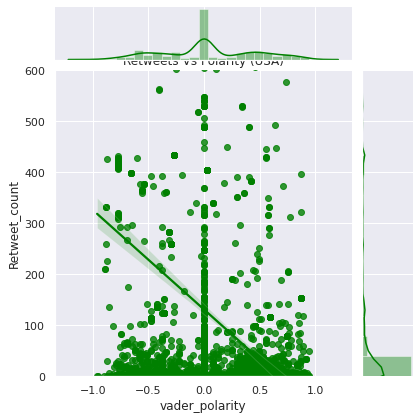

In [63]:
#Retweet_Count vs Sentiments for USA Country
sns.set(style="darkgrid")

sns.jointplot(y='Retweet_count' , x='vader_polarity',
                data=retweets_df.loc[retweets_df['Tweet_Country'] == 'USA'], kind='reg', color='Green',
                 ylim=(0,600))
plt.title('Retweets Vs Polarity (USA)')


Text(0.5, 1.0, 'Retweets Vs Polarity (Canada)')

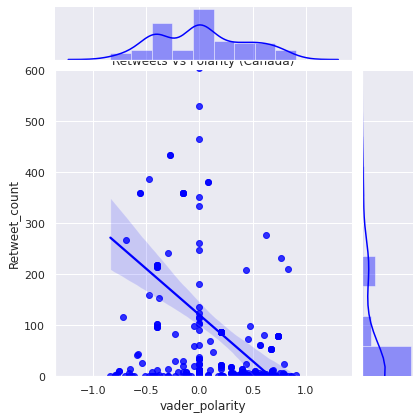

In [64]:
#Retweet_Count vs Sentiments for Canada Country
sns.set(style="darkgrid")

sns.jointplot(y='Retweet_count' , x='vader_polarity',
                data=retweets_df.loc[retweets_df['Tweet_Country'] == 'Canada'], kind='reg', color='Blue',
                 ylim=(0,600))
plt.title('Retweets Vs Polarity (Canada)')

Text(0.5, 1.0, 'Retweets Vs Polarity (India)')

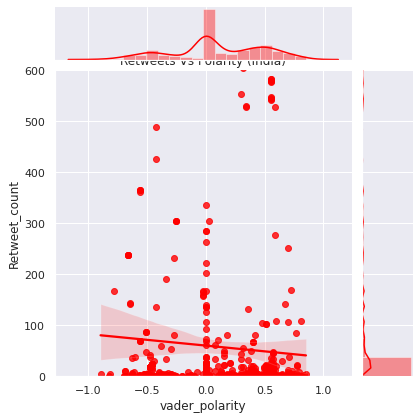

In [66]:
#Retweet_Count vs Sentiments for India Country
sns.set(style="darkgrid")

sns.jointplot(y='Retweet_count' , x='vader_polarity',
                data=retweets_df.loc[retweets_df['Tweet_Country'] == 'India'], kind='reg', color='Red',
                 ylim=(0,600))
plt.title('Retweets Vs Polarity (India)')


Text(0.5, 1.0, 'Retweets Vs Polarity (UK)')

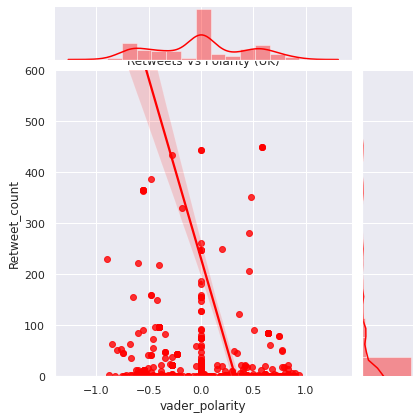

In [67]:
#Retweet_Count vs Sentiments for UK Countries
sns.set(style="darkgrid")

sns.jointplot(y='Retweet_count' , x='vader_polarity',
                data=retweets_df.loc[retweets_df['Tweet_Country'] == 'UK'], kind='reg', color='Red',
                 ylim=(0,600))
plt.title('Retweets Vs Polarity (UK)')


Text(0.5, 1.0, 'Retweets Vs Polarity (Singapore)')

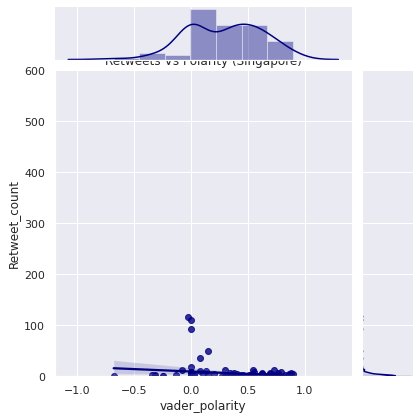

In [68]:
#Retweet_Count vs Sentiments for Singapore
sns.set(style="darkgrid")

sns.jointplot(y='Retweet_count' , x='vader_polarity',
                data=retweets_df.loc[retweets_df['Tweet_Country'] == 'Singapore'], kind='reg', color='Navy',
                 ylim=(0,600))
plt.title('Retweets Vs Polarity (Singapore)')

Text(0.5, 1.0, 'Retweets Vs Polarity (Australia)')

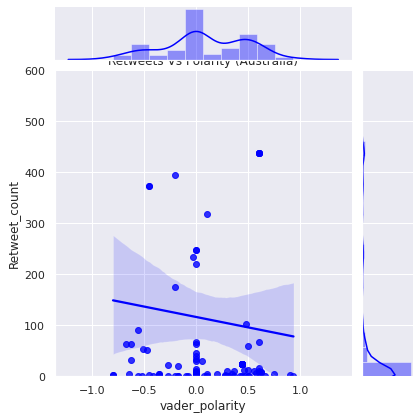

In [69]:
#Retweet_Count vs Sentiments for Australia Country
sns.set(style="darkgrid")

sns.jointplot(y='Retweet_count' , x='vader_polarity',
                data=retweets_df.loc[retweets_df['Tweet_Country'] == 'Australia'], kind='reg', color='Blue',
                 ylim=(0,600))
plt.title('Retweets Vs Polarity (Australia)')


Text(0.5, 1.0, 'Retweets Vs Polarity (Nigeria)')

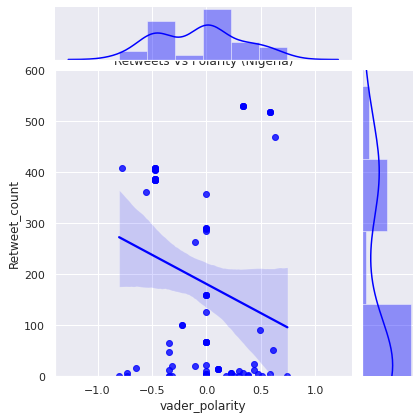

In [70]:
#Retweet_Count vs Sentiments for Nigeria Country
sns.set(style="darkgrid")

sns.jointplot(y='Retweet_count' , x='vader_polarity',
                data=retweets_df.loc[retweets_df['Tweet_Country'] == 'Nigeria'], kind='reg', color='Blue',
                 ylim=(0,600))
plt.title('Retweets Vs Polarity (Nigeria)')

Text(0.5, 1.0, 'Retweets Vs Polarity (Spain)')

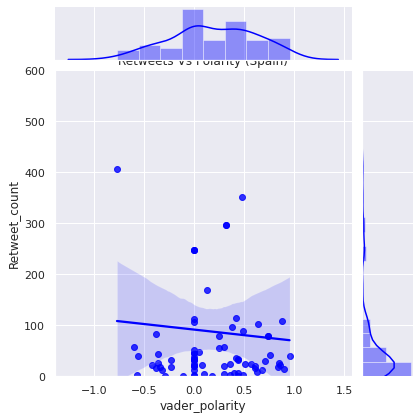

In [71]:
#Retweet_Count vs Sentiments for Spain Country
sns.set(style="darkgrid")

sns.jointplot(y='Retweet_count' , x='vader_polarity',
                data=retweets_df.loc[retweets_df['Tweet_Country'] == 'Spain'], kind='reg', color='Blue',
                 ylim=(0,600))
plt.title('Retweets Vs Polarity (Spain)')

Text(0.5, 1.0, 'Retweets Vs Polarity (Germany)')

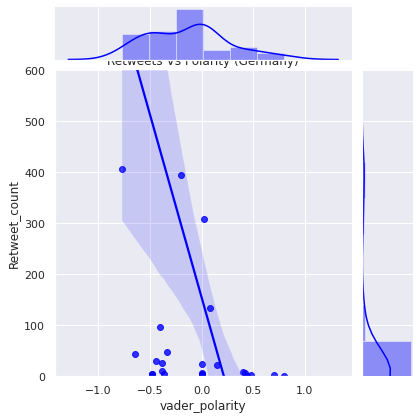

In [72]:
#Retweet_Count vs Sentiments for Germany Country
sns.set(style="darkgrid")

sns.jointplot(y='Retweet_count' , x='vader_polarity',
                data=retweets_df.loc[retweets_df['Tweet_Country'] == 'Germany'], kind='reg', color='Blue',
                 ylim=(0,600))
plt.title('Retweets Vs Polarity (Germany)')

Text(0.5, 1.0, 'Retweets Vs Polarity (South Africa)')

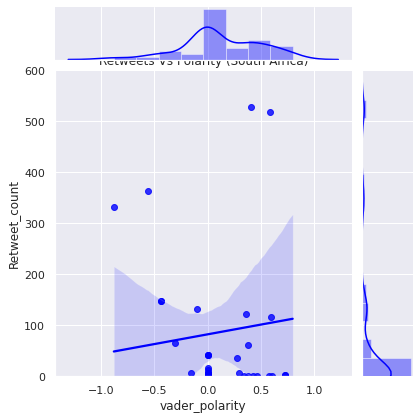

In [74]:
#Retweet_Count vs Sentiments for South Africa
sns.set(style="darkgrid")

sns.jointplot(y='Retweet_count' , x='vader_polarity',
                data=retweets_df.loc[retweets_df['Tweet_Country'] == 'South Africa'], kind='reg', color='Blue',
                 ylim=(0,600))
plt.title('Retweets Vs Polarity (South Africa)')

In [77]:
# Create New Column Num_Sentiment based on Polarity Score
cut = pd.cut(
    tweet_df['vader_polarity'],
    [-np.inf, -.2, .2, np.inf],
    labels=[-1, 0, 1]
)
tweet_df['Num_Sentiment'] = cut.values
tweet_df[['Num_Sentiment','vader_polarity']][:10]

,Num_Sentiment,vader_polarity
0,1,0.9349
1,1,0.9022
2,-1,-0.6249
3,0,0.0000
4,0,0.0000
5,0,0.0000
6,1,0.4019
7,1,0.5719
8,1,0.2023
9,1,0.2023


In [0]:
#encode country and Sentiment values
le = LabelEncoder()
encoded_country = le.fit_transform(tweet_df.loc[tweet_df['Tweet_Country'].notnull(), ['Tweet_Country']])
    
enc = OneHotEncoder(handle_unknown='ignore')
X_country = enc.fit_transform(encoded_country.reshape(-1,1)).toarray()

y=tweet_df.loc[tweet_df['Tweet_Country'].notnull(), ['Num_Sentiment']]
y.reset_index(drop=True, inplace=True)

In [0]:
#Applying LDA
lda = LDA(n_components = 2)
X_lda = lda.fit_transform(X_country, y)

In [82]:
tweets_lda = pd.concat([pd.DataFrame(X_lda), y], axis=1)
tweets_lda.head()

,0,1,Num_Sentiment
0,-0.423395,0.545669,1
1,-0.423395,0.545669,1
2,-0.395474,1.124334,-1
3,-0.395474,1.124334,0
4,-0.395474,1.124334,0


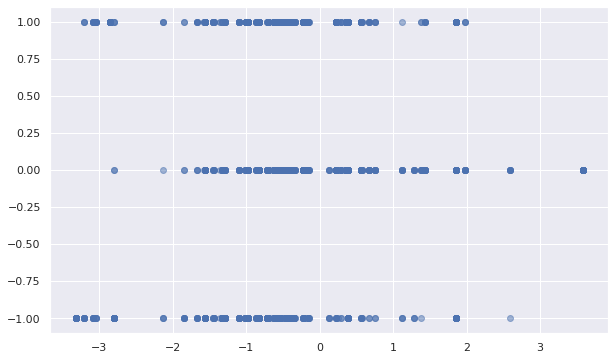

In [83]:
plt.scatter(
    X_lda[:,0],
    y,
    #c=X_lda,
    cmap='rainbow',
    alpha=0.5,
    marker='o',
    edgecolors='b')

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

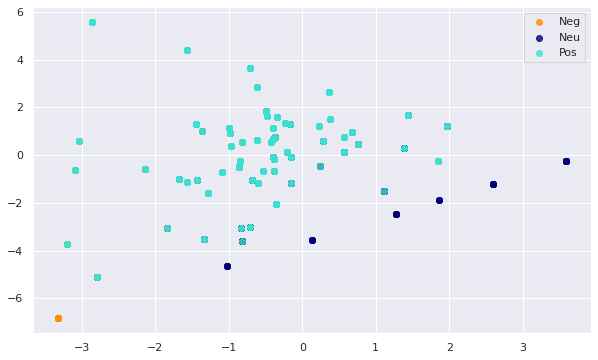

In [84]:
plt.figure()
colors = ['darkorange', 'navy', 'turquoise']

sentiment = ['Neg', 'Neu', 'Pos']

plt.figure()
for color, i, sentiment in zip(colors, [-1, 0, 1], sentiment):
    plt.scatter(X_lda[y[y['Num_Sentiment'] == i].index, 0], X_lda[y[y['Num_Sentiment'] == i].index, 1], alpha=0.8, color=color,
                label=sentiment)

plt.legend(loc='best', shadow=False)

In [0]:
#Applying PCA
pca = PCA(n_components=4)    # n_components=4 explains 70% variance
X_pca = pca.fit_transform(X_country)

In [86]:
pca_variance = pca.explained_variance_ratio_
pd.DataFrame(pca_variance).head(10)

,0
0,0.345781
1,0.175186
2,0.098051
3,0.081630


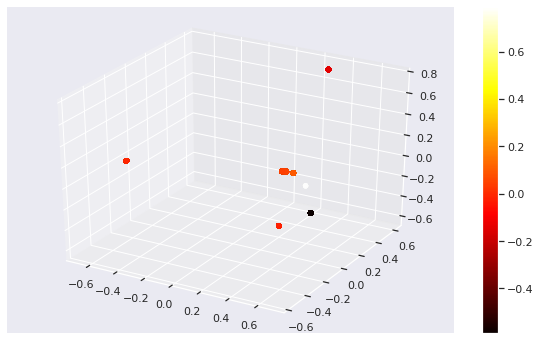

In [87]:
#3D PCA Plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X_pca[:, 0]
y = X_pca[:, 1]
z = X_pca[:, 2]
c = X_pca[:, 3]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

## WorldCloud for COVID-19 Twitter Tweet (Tweet_Text) Column values

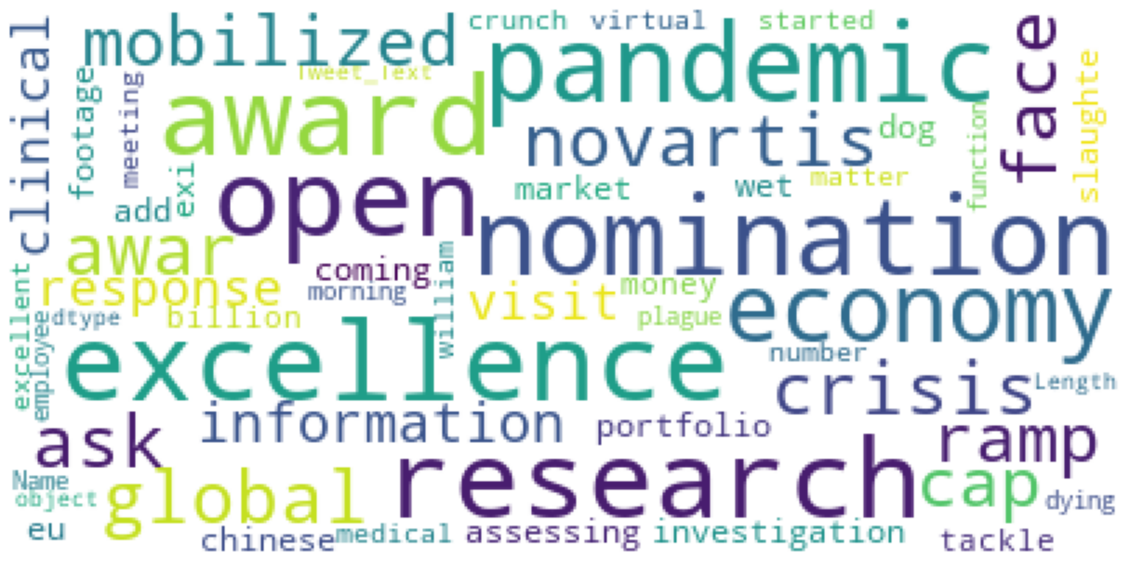

In [88]:
# Plot wordCloud for entire Tweet_Text column 
wordcloud__ = WordCloud(
                          background_color='white',
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(tweet_df['Tweet_Text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

## WorldCloud for Positive Sentiment Tweet

In [0]:
pos_tweets = tweet_df[tweet_df.vader_polarity > 0.20 ]     # extract positive tweets from tweet_df dataframe object.

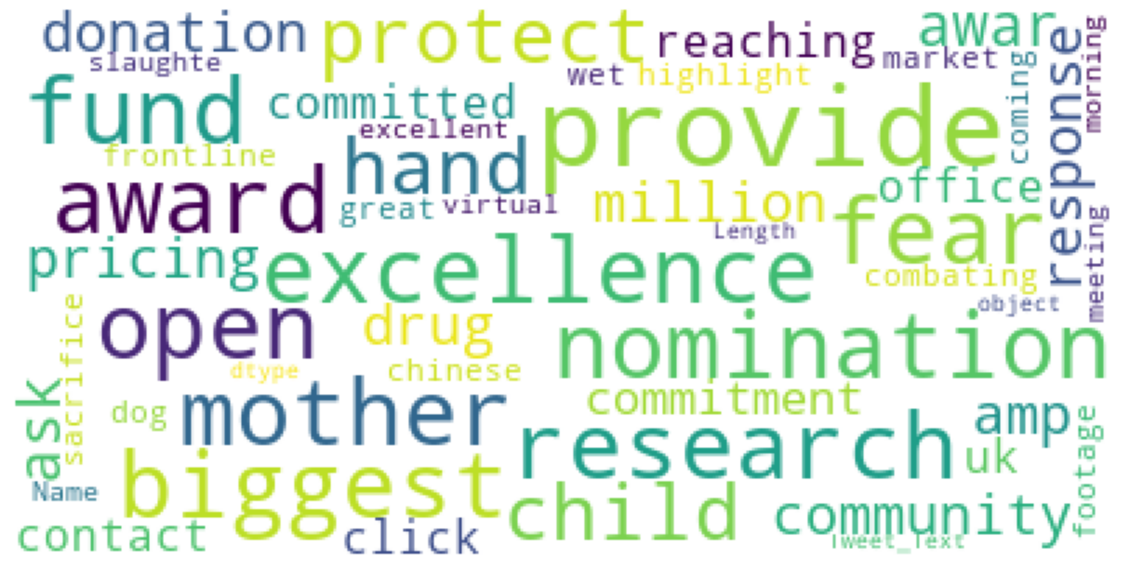

In [90]:
# Plot wordCloud for postive tweets 
wordcloud__ = WordCloud(
                          background_color='white',
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(pos_tweets['Tweet_Text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

## WordCloud for Negative Sentiment Twitter Tweet 

In [0]:
neg_tweets = tweet_df[tweet_df.vader_polarity < -0.2 ]               # extract Negative tweets from tweet_df dataframe object.

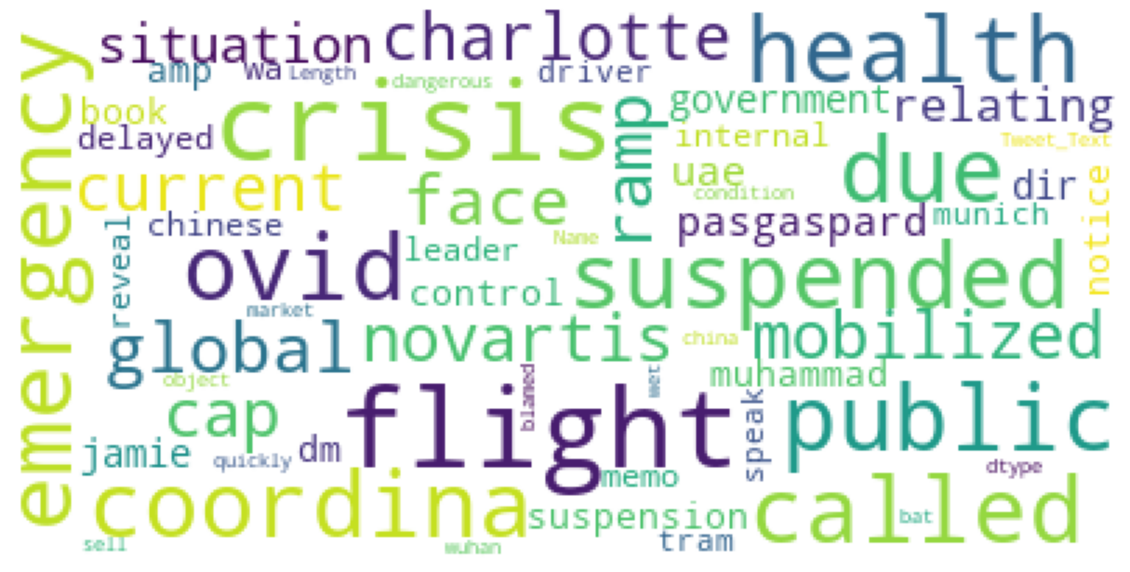

In [92]:
# Plot wordCloud for Negative tweets
wordcloud__ = WordCloud(
                          background_color='white',
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(neg_tweets['Tweet_Text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

In [0]:
netural_tweets = tweet_df[(tweet_df.vader_polarity >= -0.2) & (tweet_df.vader_polarity <= 0.2)]  # extract Neutral tweets from tweet_df dataframe object.

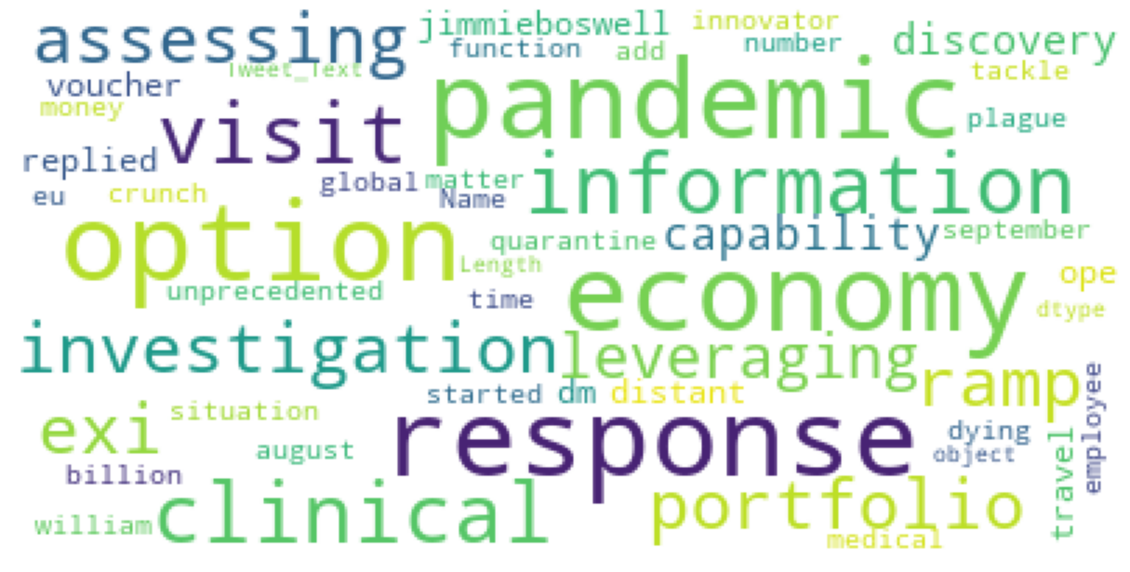

In [94]:
# Plot wordCloud for neutral tweet
wordcloud__ = WordCloud(
                          background_color='white',
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(netural_tweets['Tweet_Text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

## Create New Column Sentiment based on Polarity *Score*

In [95]:
cut = pd.cut(
    tweet_df['vader_polarity'],
    [-np.inf, -.021, .021, np.inf],
    labels=['negative', 'neutral', 'positive']      # create new column sentiment on the polarity score
)
tweet_df['sentiment'] = cut.values
tweet_df[['sentiment','vader_polarity']][:20]

,sentiment,vader_polarity
0,positive,0.9349
1,positive,0.9022
2,negative,-0.6249
3,neutral,0.0000
4,neutral,0.0000
5,neutral,0.0000
6,positive,0.4019
7,positive,0.5719
8,positive,0.2023
9,positive,0.2023


In [96]:
temp = tweet_df.groupby('sentiment').count()['Tweet_Text'].reset_index().sort_values(by='Tweet_Text',ascending=False)  # get the count of each sentiment
temp.style.background_gradient(cmap='Purples')

,sentiment,Tweet_Text
1,neutral,5123
2,positive,4659
0,negative,3942


In [97]:
tweet_df['sentiment'].value_counts()

neutral     5123
positive    4659
negative    3942
Name: sentiment, dtype: int64

## BarPlot for Sentiment 

<Figure size 864x432 with 0 Axes>

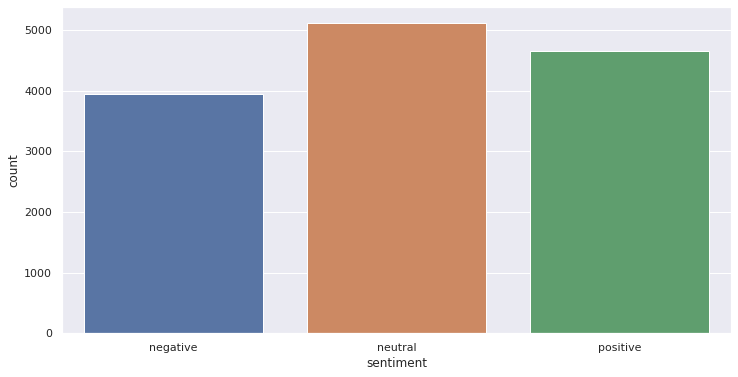

In [98]:
plt.figure(figsize=(12,6))                   #Barplot for sentiment count across input dataset
sns.countplot(x='sentiment',data=tweet_df)

## Funnel Chart for Sentiment Distribution

In [99]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.Tweet_Text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

## Plot common words in entire Tweet_Text column

In [0]:
stop_words2 = text.ENGLISH_STOP_WORDS.union(['ttp', 'amp','dm','replied'])         # Adding few more words like(ttp,amp,dm,replied) into stop_words library

In [0]:
def get_top_n_words(corpus, n=None):                                     # function for countvectorization removing ttp,amp and dm words
    vec = CountVectorizer(stop_words = stop_words2).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [102]:
common_words = get_top_n_words(tweet_df['Tweet_Text'], 20)                          # get top 20 common words in entire Tweet_Text column
Overall_df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
Overall_df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in Overall Tweet_Text after removing stop words')

In [0]:
Positive_sent = tweet_df[tweet_df['sentiment']=='positive']       # extract positive sentiment tweet from tweet_df dataframe object.
Negative_sent = tweet_df[tweet_df['sentiment']=='negative']       # extract negative sentiment tweet from tweet_df dataframe object.
Neutral_sent = tweet_df[tweet_df['sentiment']=='neutral']         # extract netural sentiment tweet from tweet_df dataframe object.

## BarPlot for Most Common words from Positive Tweet

In [104]:
common_words = get_top_n_words(Positive_sent['Tweet_Text'], 20)                    # get top 20 words from positive tweet dataframe
pos_df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
pos_df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in Positive Tweet dataframe after removing stop words')

## BarPlot for Most Common words from Negative Tweet

In [105]:
common_words = get_top_n_words(Negative_sent['Tweet_Text'], 20)                  # get top 20 words from Negative Tweet 
neg_df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
neg_df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in Negative Tweet dataframe after removing stop words')

## BarPlot for Most Common words from Neutral Tweet

In [106]:
common_words = get_top_n_words(Neutral_sent['Tweet_Text'], 20)                  # get top 20 words from Neutral Tweet 
neg_df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
neg_df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in Neutral Tweet dataframe after removing stop words')

In [0]:
def get_top_ngram(corpus, n=None):                         # Function for N-gram Model using CountVectrizer
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

## Bi-Gram Plot using Countvectorizer

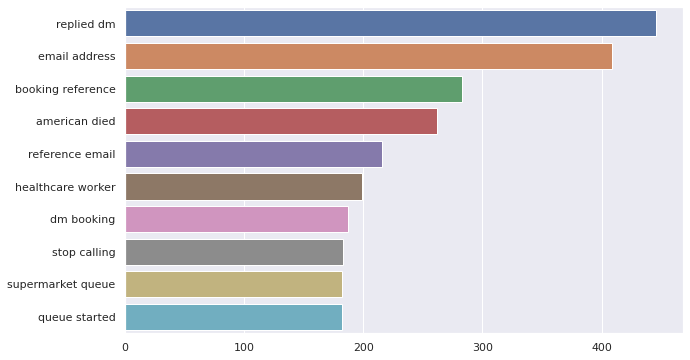

In [108]:
top_n_bigrams=get_top_ngram(tweet_df['Tweet_Text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

## Tri-Gram Plot using CountVectorizer

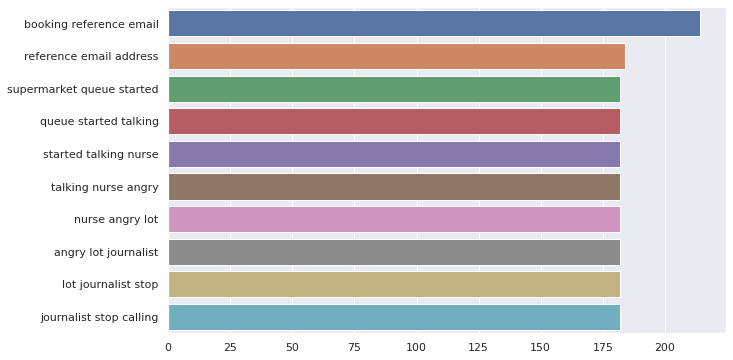

In [109]:
top_tri_grams=get_top_ngram(tweet_df['Tweet_Text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)


## TF_IDF Vectorization

In [111]:
def get_top_n_words(corpus, n=None):
    tf_idf_vec = TfidfVectorizer(ngram_range=(1,1),stop_words = stop_words2).fit(corpus)
    bag_of_words = tf_idf_vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in tf_idf_vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweet_df['Tweet_Text'], 20)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

## Bi Gram TF-IDF Vectorization on Overall Tweet_Text

In [112]:
def get_top_n_words(corpus, n=None):
    tf_idf_vec = TfidfVectorizer(ngram_range=(2,2),stop_words = stop_words2).fit(corpus)
    bag_of_words = tf_idf_vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in tf_idf_vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweet_df['Tweet_Text'], 20)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

## Tri-Gram TF-IDF Model 

In [113]:
def get_top_n_words(corpus, n=None):
    tf_idf_vec = TfidfVectorizer(ngram_range=(3,3),stop_words = stop_words2).fit(corpus)
    bag_of_words = tf_idf_vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in tf_idf_vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweet_df['Tweet_Text'], 20)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')